In [1]:
import numpy as np
import pandas as pd
import download_data as dl
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics
from conf_matrix import func_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
## step 1: load data from csv file. 
data = dl.download_data('crab.csv').values
n = 200
#split data 
S = np.random.permutation(n)
#100 training samples
Xtr = data[S[:100], :6]
Ytr = data[S[:100], 6:]
# 100 testing samples
X_test = data[S[100:], :6]
Y_test = data[S[100:], 6:].ravel()

In [36]:
## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.
#############placeholder 1: training/validation #######################
n2 = len(Xtr)
S2 = np.random.permutation(n2)
# subsets for training and validating models 
np.random.seed(10)
#x_train,x_validation,y_train,y_validation = train_test_split(Xtr,Ytr,test_size=0.5)
x_train = Xtr[S2[:50], :6]
y_train = Ytr[S2[:50]].flatten()
x_validation = Xtr[S2[50:], :6]
y_validation = Ytr[S2[50:]].flatten()
#############placeholder end #######################

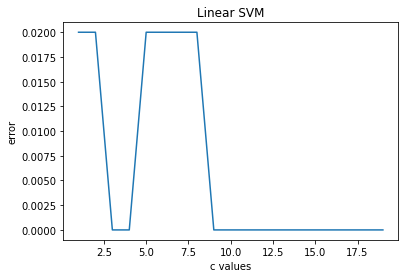

In [37]:
# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"
#############placeholder 2: Figure 1#######################
c_range =  range(1,20)
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
#plt.xticks(c_range)
plt.show()
#############placeholder end #######################

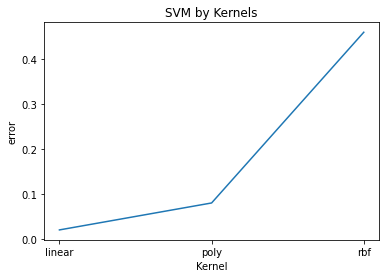

In [38]:
# 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel ( with other hyperparameters fixed) 
#############placeholder 3: Figure 2#######################
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    # your own codes
    model = svm.SVC(kernel=kernel_value, C=5)
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    svm_kernel_error.append(error)
    

plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()
#############placeholder end #######################

In [39]:
## step 4 Select the best model and apply it over the testing subset 
#############placeholder 4:testing  #######################
# write your own codes to select the best hyper-parameters: kernel and C.

best_kernel = 'linear'
best_c = 5 # poly had many that were the "best"
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=x_train, y=y_train.ravel())

#############placeholder end #######################


SVC(C=5, kernel='linear')

In [40]:
## step 5 evaluate your results in terms of accuracy, real, or precision. 

#############placeholder 5: metrics #######################
# func_confusion_matrix is provided in conf_matrix.py
# You might re-use this function from previous homework assignment.
y_pred = model.predict(X_test)
conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

#############placeholder end #######################

Confusion Matrix: 
[[46  3]
 [ 3 48]]
Average Accuracy: 0.94
Per-Class Precision: [0.93877551 0.94117647]
Per-Class Recall: [0.93877551 0.94117647]


In [41]:
#############placeholder 6: success and failure examples #######################
# Success samples: samples for which you model can correctly predict their labels
count = 0
print("Successful examples")
for i in range(0,100):
    if Y_test[i]==y_pred[i]:
        print("Y_test:" ,Y_test[i], "y_pred:" ,y_pred[i] )
        count = count+1

# Failure samples: samples for which you model can not correctly predict their labels

print("Failure examples")
for i in range(0,100):
    if Y_test[i]!=y_pred[i]:
        print("Y_test:" ,Y_test[i], "y_pred:" ,y_pred[i] )

#############placeholder end #######################


Successful examples
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: 1.0 y_pred: 1.0
Y_test: -1.0 y_pred: -1.0
Y_test: -1.0 y_pred: -1.0


In [42]:
#Parn
#############placeholder 6: success and failure examples #######################
# Success samples: samples for which you model can correctly predict their labels
count = 0

print("Successful examples")
feast = []
for i in range(0,100):
    if Y_test[i]==y_pred[i]:
        print("Y_actual:" ,Y_test[i], "Y_hat:" , "Feature:",y_pred[i], X_test[i])
        count = count+1
        a = [Y_test[i]]
        a.append(y_pred[i])
        a.extend(X_test[i])
        feast.append(a)
    if count ==5: break

# Failure samples: In my model, there are only 4 predicted valued that is incorrect.
print("\n")

print("Failure examples")

feasf = []
for i in range(0,100):
    if Y_test[i]!=y_pred[i]:
        print("Y_actual:" ,Y_test[i], "y_hat:" ,y_pred[i], "Feature:", X_test[i] )
        b = [Y_test[i]]
        b.append(y_pred[i])
        b.extend(X_test[i])
        feast.append(b)

#############placeholder end #######################

Successful examples
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 1.  15.8 15.  34.5 40.3 15.3]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 1.  19.7 15.3 41.9 48.5 17.8]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  18.6 13.4 37.8 41.9 17.3]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  12.5  9.4 24.2 27.  11.2]
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 1.  14.7 12.5 30.1 34.7 12.5]


Failure examples
Y_actual: -1.0 y_hat: 1.0 Feature: [ 0.  12.5  9.4 23.2 26.  10.8]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 1.   7.2  6.5 14.7 17.1  6.1]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 1.   9.1  8.2 19.2 22.2  7.7]
Y_actual: -1.0 y_hat: 1.0 Feature: [ 1.  12.9 11.  26.8 30.9 11.4]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 1.   9.5  8.2 19.6 22.4  7.8]
Y_actual: -1.0 y_hat: 1.0 Feature: [ 0.  10.7  8.6 20.7 22.7  9.2]


In [70]:
count = 0

print("Successful examples")
feast = []
for i in range(0,100):
    if Y_test[i]==y_pred[i]:
        print("Y_actual:" ,Y_test[i], "Y_hat:" , "Feature:",y_pred[i], X_test[i])
        count = count+1
        a = [Y_test[i]]
        a.append(y_pred[i])
        a.extend(X_test[i])
        feast.append(a)
    if count ==5: break

# Failure samples: In my model, there are only 4 predicted valued that is incorrect.
print("\n")

print("Failure examples")

feasf = []
count = 0

print("Successful examples")
feast = []
for i in range(0,100):
    if Y_test[i]==y_pred[i]:
        print("Y_actual:" ,Y_test[i], "Y_hat:" , "Feature:",y_pred[i], X_test[i])
        count = count+1
        a = [Y_test[i]]
        a.append(y_pred[i])
        a.extend(X_test[i])
        feast.append(a)
    if count ==5: break

# Failure samples: In my model, there are only 4 predicted valued that is incorrect.
print("\n")

print("Failure examples")

feasf = []
for i in range(0,100):
    if Y_test[i]!=y_pred[i]:
        print("Y_actual:" ,Y_test[i], "y_hat:" ,y_pred[i], "Feature:", X_test[i] )
        b = [Y_test[i]]
        b.append(y_pred[i])
        b.extend(X_test[i])
        feast.append(b)
count = 0
for i in range(0,100):
    if Y_test[i]!=y_pred[i]:
        print("Y_actual:" ,Y_test[i], "y_hat:" ,y_pred[i], "Feature:", X_test[i] )
        b = [Y_test[i]]
        b.append(y_pred[i])
        b.extend(X_test[i])
        feasf.append(b)


Successful examples
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 1.  15.8 15.  34.5 40.3 15.3]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 1.  19.7 15.3 41.9 48.5 17.8]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  18.6 13.4 37.8 41.9 17.3]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  12.5  9.4 24.2 27.  11.2]
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 1.  14.7 12.5 30.1 34.7 12.5]


Failure examples
Successful examples
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 1.  15.8 15.  34.5 40.3 15.3]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 1.  19.7 15.3 41.9 48.5 17.8]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  18.6 13.4 37.8 41.9 17.3]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  12.5  9.4 24.2 27.  11.2]
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 1.  14.7 12.5 30.1 34.7 12.5]


Failure examples
Y_actual: -1.0 y_hat: 1.0 Feature: [ 0.  12.5  9.4 23.2 26.  10.8]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 1.   7.2  6.5 14.7 17.1  6.1]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 1.   9.1  8.2 19.2 22.2  7.7]
Y_actual: -1.0 y_hat: 1.0 Feature: [ 1.  12.9 11.

In [63]:
# Average value of 
import pandas as pd
xdf = pd.DataFrame(X_test)
print("Average value of each features: ")
print(xdf.mean(axis = 0),'\n')
print("Meadian of each features: ")
xdf.median(axis = 0) 

Average value of each features: 
0     0.520
1    15.363
2    12.593
3    31.686
4    35.978
5    13.844
dtype: float64 

Meadian of each features: 


0     1.00
1    15.60
2    12.65
3    32.35
4    37.00
5    13.95
dtype: float64

In [69]:
sum1 = feast + feasf # combine dataframe (sucessful cases and failure case)
sum1

[[1.0, 1.0, 1.0, 15.8, 15.0, 34.5, 40.3, 15.3],
 [-1.0, -1.0, 1.0, 19.7, 15.3, 41.9, 48.5, 17.8],
 [-1.0, -1.0, 0.0, 18.6, 13.4, 37.8, 41.9, 17.3],
 [-1.0, -1.0, 0.0, 12.5, 9.4, 24.2, 27.0, 11.2],
 [1.0, 1.0, 1.0, 14.7, 12.5, 30.1, 34.7, 12.5],
 [-1.0, 1.0, 0.0, 12.5, 9.4, 23.2, 26.0, 10.8],
 [1.0, -1.0, 1.0, 7.2, 6.5, 14.7, 17.1, 6.1],
 [1.0, -1.0, 1.0, 9.1, 8.2, 19.2, 22.2, 7.7],
 [-1.0, 1.0, 1.0, 12.9, 11.0, 26.8, 30.9, 11.4],
 [1.0, -1.0, 1.0, 9.5, 8.2, 19.6, 22.4, 7.8],
 [-1.0, 1.0, 0.0, 10.7, 8.6, 20.7, 22.7, 9.2]]

In [65]:
#Rename index and column
summary = pd.DataFrame(sum1, columns = ['Y_actual', 'Y_hat', 'f1','f2','f3','f4','f5','f6' ], 
                       index = np.repeat(['Sucess', 'Failure'], [5, 4], axis=0))

ValueError: Shape of passed values is (11, 8), indices imply (9, 8)

In [58]:
#Sumarize statistics of features
mea = pd.DataFrame(xdf.mean(axis = 0), columns = ['mean']).T #mean
med = pd.DataFrame(xdf.median(axis = 0), columns = ['median']).T #meandian
sum3 = pd.concat([mea, med]) #comebine table
sum3.columns = ['f1','f2','f3','f4','f5','f6'] # rename columns
sum3.insert(0, "Y_actual",['-','-'] ) #insert Na for Y actual
sum3.insert(1, "Y_hat",['-','-'] ) 
sum3

,Y_actual,Y_hat,f1,f2,f3,f4,f5,f6
mean,-,-,0.52,15.363,12.593,31.686,35.978,13.844
median,-,-,1.00,15.600,12.650,32.350,37.000,13.950


In [59]:
summary1 = pd.concat([summary,sum3])

NameError: name 'summary' is not defined

In [60]:
summary1

NameError: name 'summary1' is not defined

In [61]:
plt.figure(figsize=(5,6))
plt.plot(np.arange(1,7,1), summary1.iloc[ 0 , 2: ] , "v", label="success", c = 'green')
for i in range (1,5,1): 
    plt.plot(np.arange(1,7,1), summary1.iloc[ i , 2: ] , "v",  c = 'green')

plt.plot(np.arange(1,7,1), summary1.iloc[ 5 , 2: ] , "v", label="failure", c = 'orangered')
for i in range (1,4,1): 
    plt.plot(np.arange(1,7,1), summary1.iloc[ i+5 , 2: ] , "v", c = 'orangered')
plt.plot(np.arange(1,7,1), summary1.iloc[ 10 , 2: ] , "x", label="mean", c = 'blue')

plt.xlabel("feature")
plt.ylabel("value")
xlims = plt.xlim()
plt.xlim(xlims)
plt.legend(loc= (0.01,0.75))

plt.show

NameError: name 'summary1' is not defined

<Figure size 360x432 with 0 Axes>

In [48]:
xdf = pd.DataFrame(X_test)
print("Average value of each features: ")
print(xdf.mean(axis = 0),'\n')
print("Meadian of each features: ")
xdf.median(axis = 0) 

Average value of each features: 
0     0.520
1    15.363
2    12.593
3    31.686
4    35.978
5    13.844
dtype: float64 

Meadian of each features: 


0     1.00
1    15.60
2    12.65
3    32.35
4    37.00
5    13.95
dtype: float64